# ISSS610-Applied Machine Learning
## Business Problem
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

# Data Set
This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

https://www.sciencedirect.com/science/article/pii/S2352340918315191

Done By 
- Anna Choo Xin Yi
- Filbert
- Wesley Djingga
- Xie Jianlong
- Zhang Jieyuan


# Import Libraries

In [1]:
#Import all here
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pandas as pd
import dill as pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras
warnings.filterwarnings("ignore")
%matplotlib inline


## Data Retrival

In [2]:
x_under_train,x_under_test,y_under_train,y_under_test,x_train,x_test,y_train,y_test = pickle.load(open("2.out.x_y_train_test", 'rb'))

## Neural Network

### Feature Engineering

### Train my hot encoder

In [3]:
#Take from Forest
enc = pickle.load(open("3a.out.enc", 'rb'))

### Create my nn Transform function

In [4]:
forest_transform = pickle.load(open("3a.out.forest_transform", 'rb'))

def nn_transform(input_x):
    scaler = pickle.load(open("3b.out.scaler", 'rb'))
    return scaler.transform(forest_transform(input_x))
pickle.dump(nn_transform,open("3d.out.nn_transform",'wb'))

## Test Default Result

### Without Down Sampling

In [5]:
#1m 39s
nn = Sequential()
nn.add(Dense(78, input_dim=nn_transform(x_train).shape[1], activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(39, activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(19, activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(10, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn.fit(nn_transform(x_train), y_train, epochs=100, batch_size=1024, verbose=2)

y_pred_test_nn = nn.predict(nn_transform(x_test))
# # View accuracy score
print(accuracy_score(y_test, y_pred_test_nn>0.5))

# # View confusion matrix for test_knn data and predictions
print(confusion_matrix(y_test, y_pred_test_nn>0.5))

# View the classification report for test_knn data and predictions
print(classification_report(y_test, y_pred_test_nn>0.5))

Epoch 1/100
91/91 - 1s - loss: 0.6087 - accuracy: 0.6605 - 1s/epoch - 13ms/step
Epoch 2/100
91/91 - 1s - loss: 0.4352 - accuracy: 0.7949 - 577ms/epoch - 6ms/step
Epoch 3/100
91/91 - 1s - loss: 0.3859 - accuracy: 0.8203 - 642ms/epoch - 7ms/step
Epoch 4/100
91/91 - 1s - loss: 0.3614 - accuracy: 0.8336 - 629ms/epoch - 7ms/step
Epoch 5/100
91/91 - 1s - loss: 0.3478 - accuracy: 0.8394 - 608ms/epoch - 7ms/step
Epoch 6/100
91/91 - 1s - loss: 0.3373 - accuracy: 0.8463 - 669ms/epoch - 7ms/step
Epoch 7/100
91/91 - 1s - loss: 0.3324 - accuracy: 0.8491 - 647ms/epoch - 7ms/step
Epoch 8/100
91/91 - 1s - loss: 0.3247 - accuracy: 0.8524 - 597ms/epoch - 7ms/step
Epoch 9/100
91/91 - 1s - loss: 0.3199 - accuracy: 0.8543 - 698ms/epoch - 8ms/step
Epoch 10/100
91/91 - 1s - loss: 0.3146 - accuracy: 0.8575 - 660ms/epoch - 7ms/step
Epoch 11/100
91/91 - 1s - loss: 0.3110 - accuracy: 0.8597 - 660ms/epoch - 7ms/step
Epoch 12/100
91/91 - 1s - loss: 0.3062 - accuracy: 0.8617 - 666ms/epoch - 7ms/step
Epoch 13/100
91

### With Down Sampling

In [6]:
#57s
nn_under = Sequential()
nn_under.add(Dense(78, input_dim=nn_transform(x_under_train).shape[1], activation='relu'))
nn_under.add(Dropout(0.2))
nn_under.add(Dense(39, activation='relu'))
nn_under.add(Dropout(0.2))
nn_under.add(Dense(19, activation='relu'))
nn_under.add(Dropout(0.2))
nn_under.add(Dense(10, activation='relu'))
nn_under.add(Dropout(0.2))
nn_under.add(layers.Dense(1, activation='sigmoid'))

nn_under.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn_under.fit(nn_transform(x_under_train), y_under_train, epochs=100, batch_size=1024, verbose=2)

y_under_pred_test_nn = nn_under.predict(nn_transform(x_under_test))
# # View accuracy score
print(accuracy_score(y_under_test, y_under_pred_test_nn>0.5))

# # View confusion matrix for test_nn data and predictions
print(confusion_matrix(y_under_test, y_under_pred_test_nn>0.5))

# View the classification report for test_nn data and predictions
print(classification_report(y_under_test, y_under_pred_test_nn>0.5))

Epoch 1/100
68/68 - 1s - loss: 0.6221 - accuracy: 0.6441 - 946ms/epoch - 14ms/step
Epoch 2/100
68/68 - 0s - loss: 0.4622 - accuracy: 0.7786 - 461ms/epoch - 7ms/step
Epoch 3/100
68/68 - 0s - loss: 0.4124 - accuracy: 0.8063 - 472ms/epoch - 7ms/step
Epoch 4/100
68/68 - 0s - loss: 0.3890 - accuracy: 0.8179 - 426ms/epoch - 6ms/step
Epoch 5/100
68/68 - 0s - loss: 0.3712 - accuracy: 0.8251 - 497ms/epoch - 7ms/step
Epoch 6/100
68/68 - 0s - loss: 0.3590 - accuracy: 0.8315 - 458ms/epoch - 7ms/step
Epoch 7/100
68/68 - 0s - loss: 0.3511 - accuracy: 0.8339 - 484ms/epoch - 7ms/step
Epoch 8/100
68/68 - 0s - loss: 0.3448 - accuracy: 0.8387 - 455ms/epoch - 7ms/step
Epoch 9/100
68/68 - 0s - loss: 0.3391 - accuracy: 0.8415 - 482ms/epoch - 7ms/step
Epoch 10/100
68/68 - 0s - loss: 0.3343 - accuracy: 0.8443 - 449ms/epoch - 7ms/step
Epoch 11/100
68/68 - 0s - loss: 0.3291 - accuracy: 0.8466 - 477ms/epoch - 7ms/step
Epoch 12/100
68/68 - 0s - loss: 0.3258 - accuracy: 0.8496 - 425ms/epoch - 6ms/step
Epoch 13/100

## Final Result -Without Downsampling

 
Confusion_matrix:
[[13231  1180]
 [ 1946  6753]]
Accuracy: 0.8647338814366076
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14411
           1       0.85      0.78      0.81      8699

    accuracy                           0.86     23110
   macro avg       0.86      0.85      0.85     23110
weighted avg       0.86      0.86      0.86     23110



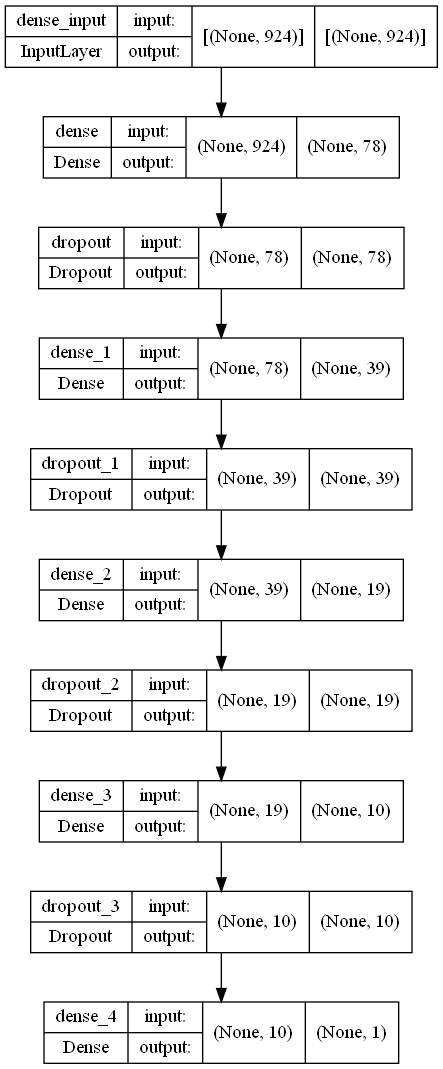

In [7]:
# Choose without downsampling as training set
report = """ 
Confusion_matrix:
{}
Accuracy: {}
Classification Report:
{}""".format(
metrics.confusion_matrix(y_test, y_pred_test_nn>0.5),
metrics.accuracy_score(y_test, y_pred_test_nn>0.5),
metrics.classification_report(y_test, y_pred_test_nn>0.5))
print(report)

tf.keras.utils.plot_model(nn, "3d.out.nn.png", show_shapes=True)

## Performance Measure

### ROC

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.938


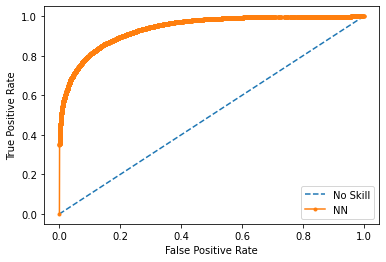

In [8]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
lr_probs = nn.predict(nn_transform(x_test))
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='NN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Export

In [9]:
nn.save('3d-out-nn/')

INFO:tensorflow:Assets written to: 3d-out-nn/assets
